In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

CSV_URL = 'http://bit.ly/uforeports'
response = requests.get(CSV_URL)
if response.status_code == 200:
    with open('uforeports.csv','wb') as f:
        for chunk in response.iter_content(chunk_size=128):
            f.write(chunk)
else:
    print('下載錯誤')


df = pd.read_csv("uforeports.csv")
df1 = df.set_index(['State', 'City'])
df1

,,Colors Reported,Shape Reported,Time
State,City,,,
NY,Ithaca,NaN,TRIANGLE,6/1/1930 22:00
NJ,Willingboro,NaN,OTHER,6/30/1930 20:00
CO,Holyoke,NaN,OVAL,2/15/1931 14:00
KS,Abilene,NaN,DISK,6/1/1931 13:00
NY,New York Worlds Fair,NaN,LIGHT,4/18/1933 19:00
...,...,...,...,...
IL,Grant Park,NaN,TRIANGLE,12/31/2000 23:00
IA,Spirit Lake,NaN,DISK,12/31/2000 23:00
WI,Eagle River,NaN,NaN,12/31/2000 23:45


In [2]:
df1.sort_index()

Colors Reported Shape Reported  \
State City                                                       
AK    Adak                                  NaN          LIGHT   
      Alaska                                NaN           DISK   
      Alaska                                NaN          LIGHT   
      Anchorage                             NaN           DISK   
      Anchorage                            BLUE         CIRCLE   
...                                         ...            ...   
WY    Wheeling                              NaN            NaN   
      Wyoming                               NaN          CIGAR   
      Wyoming                               NaN          OTHER   
      Yellowstone National Park             NaN            EGG   
      Yellowstone Park                      NaN           DISK   

                                            Time  
State City                                        
AK    Adak                         6/1/1986 0:00  
      Alaska                     1/15/1998 13:00  
      Alaska                      9/1/1999 23:00  
      Anchorage                  6/10/1949 21:00  
      Anchorage                   8/30/1972 1:30  
...                                          ...  
WY    Wheeling                   6/15/1984 20:30  
      Wyoming                     7/12/1967 2:00  
      Wyoming                     4/20/1983 0:00  
      Yellowstone National Park  6/30/1971 14:00  
      Yellowstone Park            7/15/1956 0:00  

[18241 rows x 3 columns]

In [4]:
df2 = df1.groupby('State').count()
df3 = df2['Time']
df3

State
AK     116
AL     193
AR     206
AZ     738
CA    2529
CO     367
CT     225
Ca       1
DE      43
FL     837
Fl       4
GA     325
HI      85
IA     162
ID     130
IL     613
IN     326
KS     176
KY     244
LA     174
MA     322
MD     215
ME     181
MI     591
MN     254
MO     448
MS     139
MT     144
NC     356
ND      51
NE     101
NH     125
NJ     370
NM     241
NV     284
NY     914
OH     667
OK     193
OR     534
PA     598
RI      67
SC     166
SD      57
TN     286
TX    1027
UT     193
VA     299
VT      44
WA    1322
WI     357
WV     132
WY      69
Name: Time, dtype: int64

Text(0.5, 1.0, 'Apperarance times of UFO of every state')

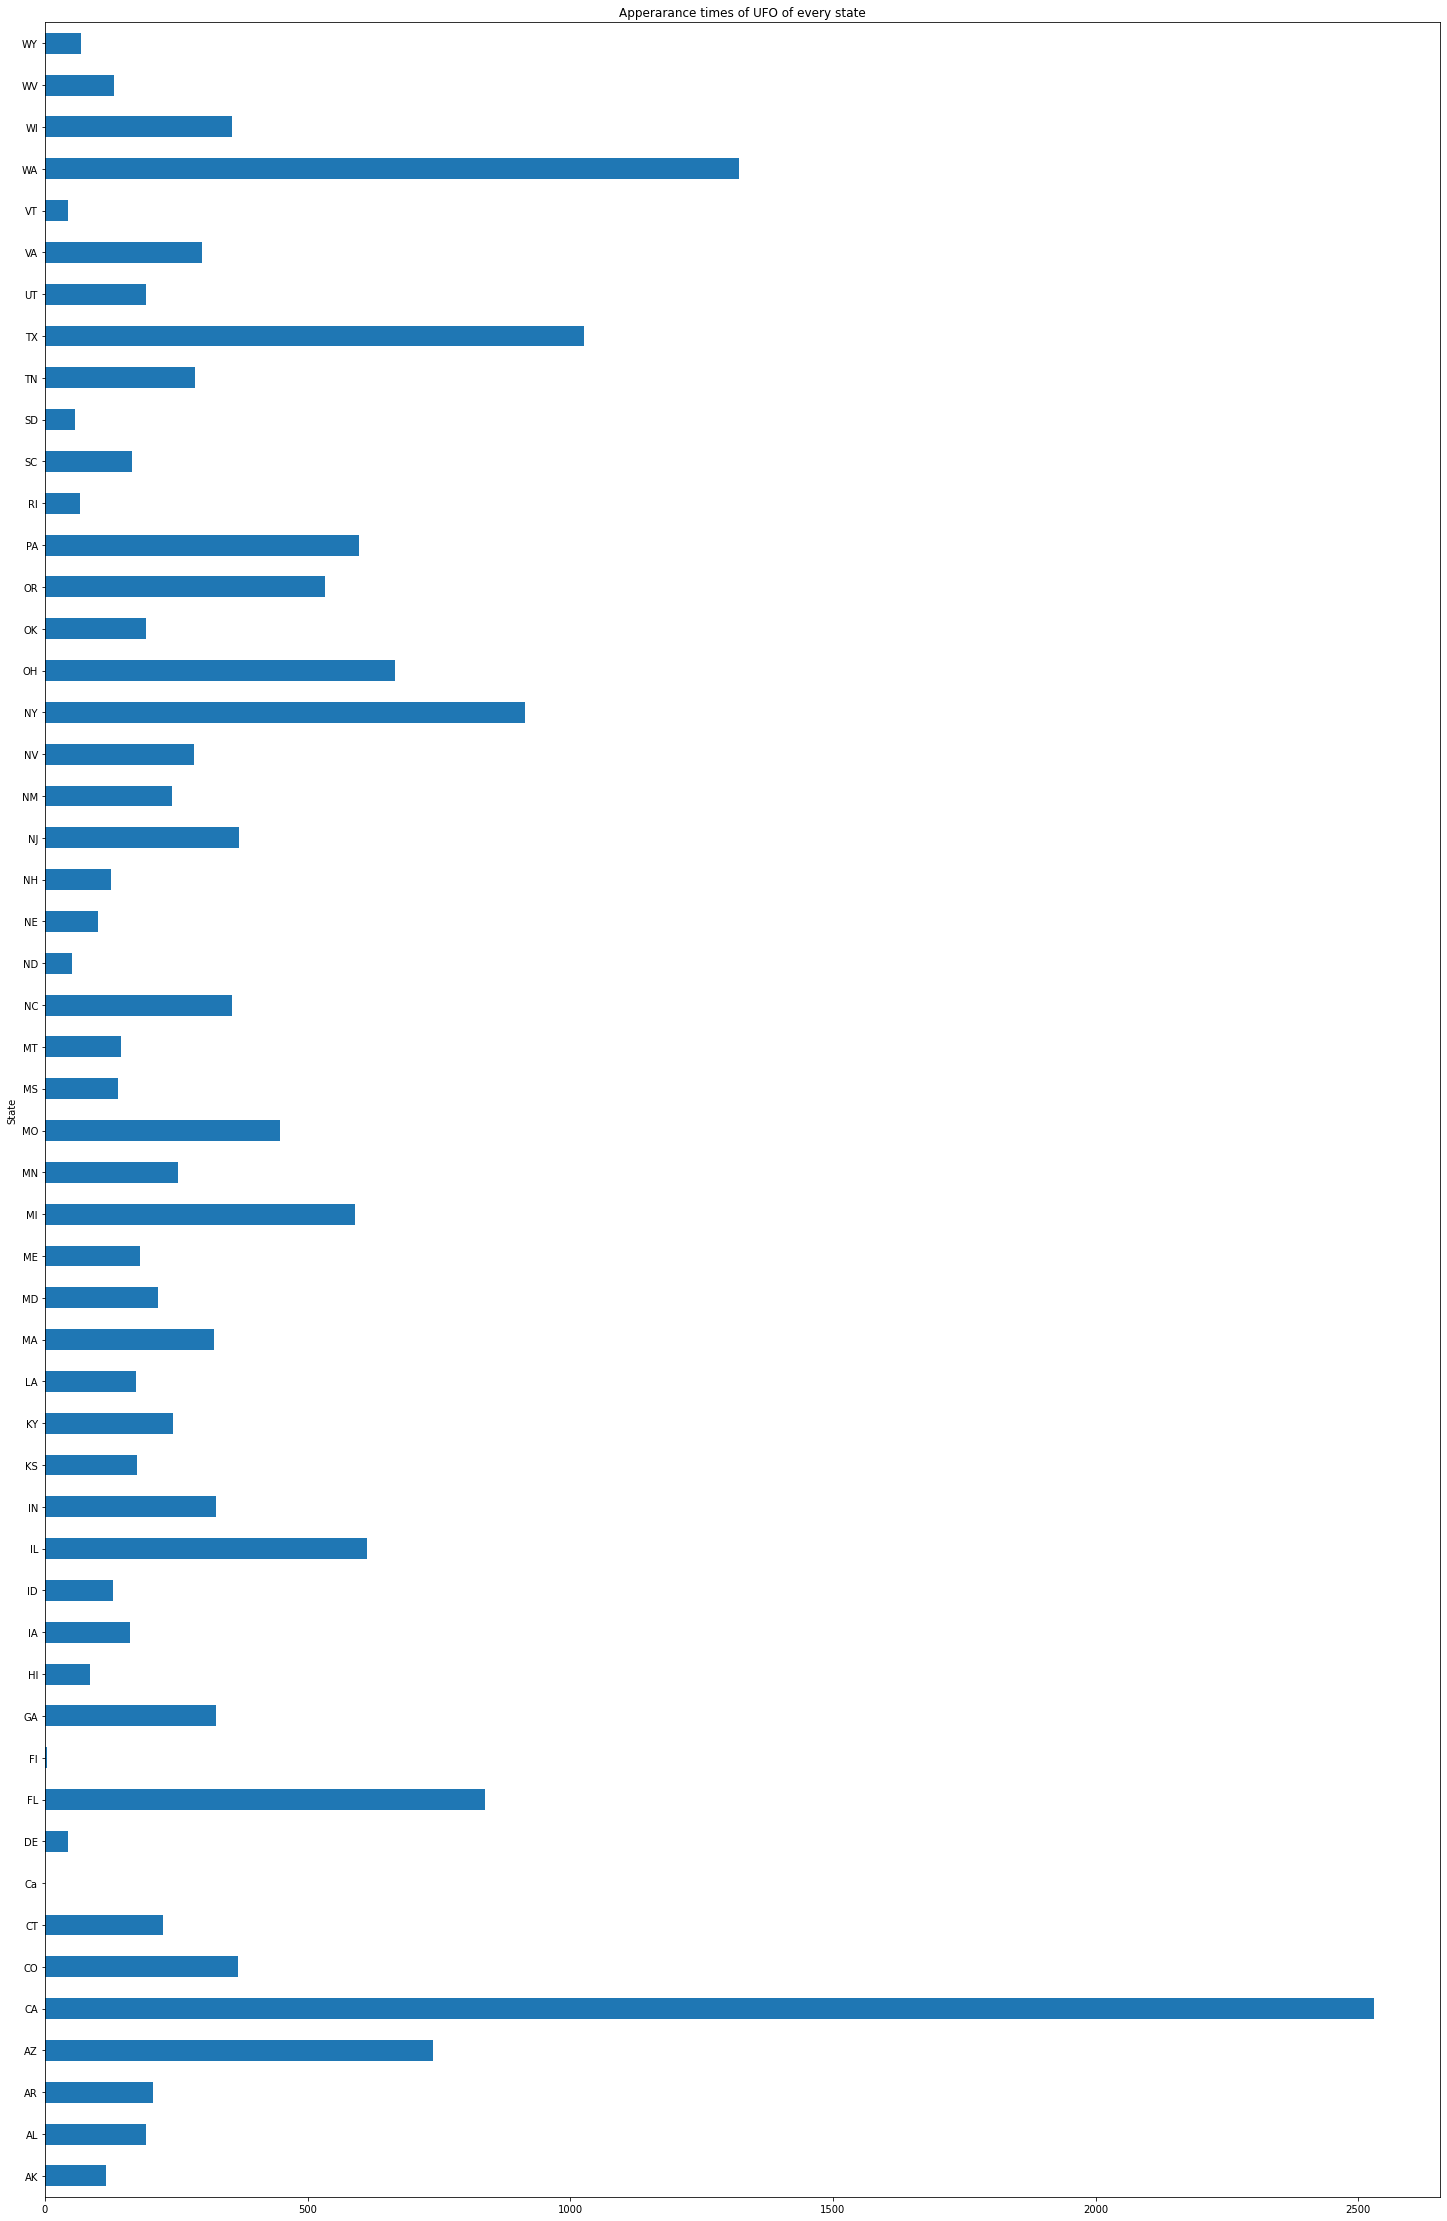

In [5]:
figure = plt.figure(figsize=(25,40))
ax1 = figure.add_subplot(1,1,1)
df3.plot.barh(ax=ax1)
ax1.set_title('Apperarance times of UFO of every state')